In [2]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@request-list pandas
# ! pip install linked-data-latex
# ! pip install ruamel.yaml
# ! pip install pymosaic-fits


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData
import io

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [3]:
# oda:version "dev1.1.15"

In [4]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [5]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [6]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [7]:
T0_isot = "2022-10-09T13:17:00"
T0_ijd = Time(T0_isot, scale='utc').tt.mjd - 51544

src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>

In [8]:
float(Time(51544, format='mjd', scale='ut1').mjd) - Time(51544, format='mjd', scale='tai').mjd

0.0

In [9]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

dd['sc']

{'barytime': 0.14860478635175947,
 'bodies': {'earth': {'body_dec': -69.422,
   'body_distance': 0,
   'body_in_sc': [96.70700691257376, -177.92729061769077],
   'body_ra': 19.505999999999972,
   'body_size': 2.6519059844215565,
   'integral_parallax': 57.29577951308232,
   'separation': 137648.7},
  'moon': {'body_dec': -69.422,
   'body_distance': 378263.6197848711,
   'body_in_sc': [107.42311113501043, 175.44388878344608],
   'body_ra': 19.505999999999972,
   'body_size': 0.2257527511911254,
   'integral_parallax': 17.889794313691343,
   'separation': 440848.53225096094},
  'sun': {'body_dec': -69.422,
   'body_distance': 149429798.59580338,
   'body_in_sc': [67.89812327806959, -3.2523349448476337],
   'body_ra': 19.505999999999972,
   'body_size': 0.2668117335302039,
   'integral_parallax': 0.0527904100405045,
   'separation': 149396255.10412204}},
 'd_scx': 65.81131216259752,
 'd_scy': 148.90559844165924,
 'd_scz': 108.32307498976417,
 'dyz_scy': 159.8406485434722,
 'dyz_scz': 110

In [10]:
acslc_r = requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/2000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8317.531125,0.001364,5264.0,45820.001364
1,8317.531125,0.051363,5102.0,45820.051363
2,8317.531126,0.101364,5234.0,45820.101364
3,8317.531127,0.151363,5374.0,45820.151363
4,8317.531127,0.201365,5244.0,45820.201364
...,...,...,...,...
79995,8317.577418,3999.754042,5322.0,49819.754042
79996,8317.577419,3999.804041,5130.0,49819.804041
79997,8317.577419,3999.854042,5376.0,49819.854042
79998,8317.577420,3999.904042,5426.0,49819.904041


In [11]:
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>

In [12]:
import subprocess
import io
import pathlib
from astropy.io import fits

def sshopen(fn):
    cfn = pathlib.Path("/tmp/sshopen-cache/") / fn.replace("/", "_")
    cfn.parent.mkdir(exist_ok=True)

    try:
        of = fits.open(cfn)
    except:
        f = io.BytesIO(subprocess.check_output(f"ssh login01.astro.unige.ch tar cf - {fn} | tar xf - -O", shell=True))

        with open(cfn, "wb") as F:
            F.write(f.read())
        
        of = fits.open(cfn)
    return of

sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")


[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff955df5670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df39d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df3670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df4ac0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff956091dc0>]

In [13]:
sshopen("/isdc/arc/rev_3/scw/2558/255800290010.001/compton_events.fits.gz")

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7ff955dac730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df5e80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df50d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955df8730>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7ff955daa9a0>]

In [14]:
ijd2plot = lambda T: (T - T0_ijd)*24*3600

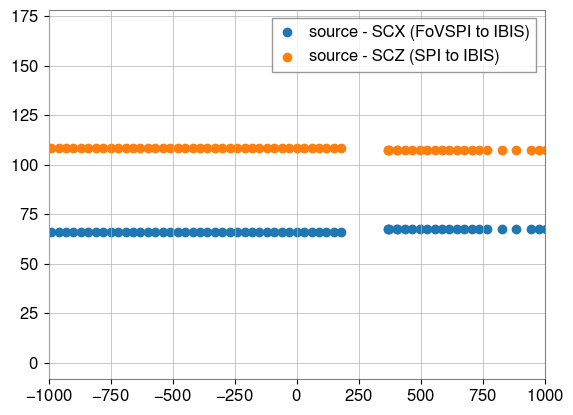

In [15]:
att_hist = sshopen("/isdc/arc/rev_3/aux/adp/2558.001/attitude_historic.fits.gz")[1].data
scx = SkyCoord(att_hist['RA_SCX'], att_hist['DEC_SCX'], unit="deg")
scz = SkyCoord(att_hist['RA_SCZ'], att_hist['DEC_SCZ'], unit="deg")


plt.figure()
plt.scatter(
    ijd2plot(att_hist['TIME']),
    # att_hist['RA_SCX'],
    # att_hist['DEC_SCX']
    scx.separation(src_coord),
    label="source - SCX (FoVSPI to IBIS)"
)

plt.scatter(
    ijd2plot(att_hist['TIME']),
    # att_hist['RA_SCX'],
    # att_hist['DEC_SCX']
    scz.separation(src_coord),
    label="source - SCZ (SPI to IBIS)"
)
plt.xlim([-1000, 1000])
plt.legend()

In [16]:
T0_pointing_coord = dd['sc']['scx']
T0_pointing_coord

{'dec': -41.012, 'ra': 261.096}

In [17]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)


np.sum([mce[i].c for i in range(8)], axis=0)

array([9336, 9440, 9537, ..., 9326, 9397, 9508])

In [18]:
scw_dict_prompt = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/{T0_ijd-500/24/3600}/{T0_ijd+2000/24/3600}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=200&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())


In [19]:
# https://heasarc.gsfc.nasa.gov/docs/integral/ao19-docs-b/AO19_recommended_programme.pdf

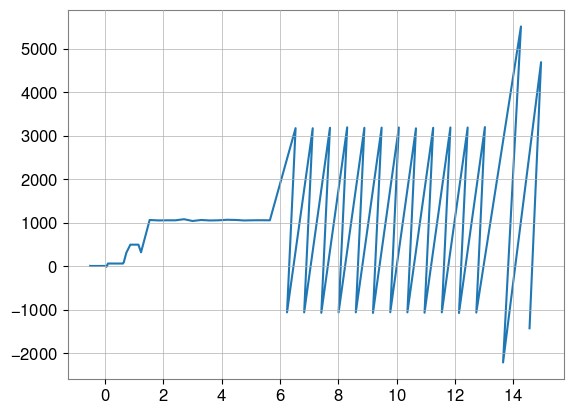

In [20]:
picsit_lc = pd.read_csv("picsit/grb221009a_afterglow_picsit_lc.txt", delim_whitespace=True, names=["mjd", "flux"])
picist_hr = pd.read_csv("picsit/grb221009a_afterglow_picsit_hr.txt", delim_whitespace=True, names=["mjd", "hr"])

# plt.plot(
#     (picist_hr.mjd - (T0_ijd + 51544))*24, 
#     picist_hr.hr, 
# )

t_since_t0 = np.array(picist_hr.mjd) - (T0_ijd + 51544)

plt.plot(
    t_since_t0[1:]*24, 
    (t_since_t0[1:] - t_since_t0[:-1])*24*3600, 
)
# plt.xlim([0.05, 0.09])
# plt.ylim([0, 1])


# plt.loglog()

first to COMP-SGLE-ALL 270647
adding to COMP-SGLE-ALL 34420
adding to COMP-SGLE-ALL 317446
bkg for COMP-SGLE-ALL = 138.90284938271589


(-5000.0, 60000.0)

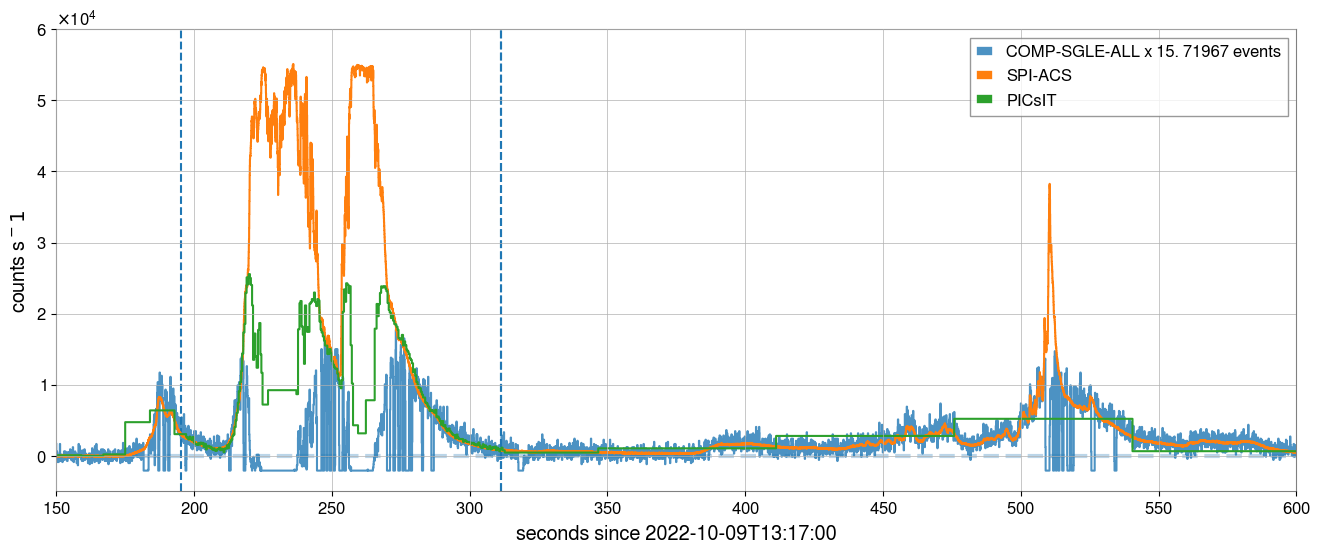

In [29]:
plt.figure(figsize=(16, 6))

from collections import defaultdict

hs_by_et = defaultdict(list)
cs_by_et = defaultdict(list)

compton_event_file = {}
isgri_event_file = {}

events_by_ext = {}

plt.axhline(0, lw=3, ls="--", alpha=0.3)

for i, r in scw_dict_prompt.iterrows():
    scwid = r.SWID

    compton_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/compton_events.fits.gz")
    isgri_event_file[scwid]  = sshopen(f"/isdc/arc/rev_3/scw/{scwid[:4]}/{scwid}.001/isgri_events.fits.gz")    
    # compton_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/compton_events.fits.gz")
    # isgri_event_file[scwid]  = sshopen(f"/isdc/pvphase/nrt/ops/scw/{scwid[:4]}/{scwid}.000/isgri_events.fits.gz")    


    for C, color, ext in [
                    # (isgri_event_file, 'y', "ISGR-EVTS-ALL"),
                    # (compton_event_file, 'g', "COMP-MULE-ALL"),
                    (compton_event_file, 'r', 'COMP-SGLE-ALL')
                ]:
        data = C[scwid][ext].data

        label=ext + " " + scwid
    


        ijd2plot = lambda T: (T - T0_ijd)*24*3600

        if ijd2plot(r.TSTART) > -100:
            plt.axvline(
                ijd2plot(r.TSTART), ls="--",
            )
            plt.axvline(
                ijd2plot(r.TSTOP), ls="--",
            )

            # plt.text(ijd2plot(r.TSTART), 10000, f"{scwid[6:8]}\n{scwid[10:12]}")
            # plt.text(ijd2plot(r.TSTART), 4000, scwid, rotation=90)


        # plt.axvspan(
        #     ijd2plot(r.TSTART),
        #     ijd2plot(r.TSTOP),
        #     alpha=0.2,
        #     color='red'
        # )

        if ext in events_by_ext:
            print("adding to", ext, len(data))
            events_by_ext[ext] = np.concatenate([events_by_ext[ext], data])
        else:
            print("first to", ext, len(data))
            events_by_ext[ext] = data

        
        label = None


for ext, data in events_by_ext.items():
    T = data['TIME']

    Ei = 0
    Ep = 0

    try:
        Ei = data['ISGRI_ENERGY']            
    except:
        pass
    
    try:
        Ep = data['PICSIT_ENERGY']
    except:
        pass

    Ec = Ei + Ep

    h = np.histogram(ijd2plot(T), bins=np.linspace(-10, 800, int(810/0.1)))
    dt = (h[1][1:] - h[1][:-1])
    tc = (h[1][1:] + h[1][:-1]) / 2.
    rate = h[0] / dt

    
    scale = {"ISGR-EVTS-ALL": 3,
             "COMP-MULE-ALL": 100,
             'COMP-SGLE-ALL': 15 }[ext]
    
    b = np.mean(rate[(tc < 150) & (tc > 50) & (rate>0)])

    print("bkg for", ext, "=", b)

    N = np.sum(((rate - b)*dt)[(rate - b>0) & (tc > 100) & (tc <700)])
    
    plt.step(tc, (rate - b)*scale, alpha=0.8, label=f"{ext} x {scale:d}. {N:.0f} events")
    
ijd2plot = lambda t:(t- T0_ijd)*24*3600

# acs_cts2es = 1.5e-10

b = np.mean(acslc.c[(acslc.t- T0_ijd)*24*3600 < 200])
plt.step(ijd2plot(acslc.t), (acslc.c - b)/2, label="SPI-ACS")

# isgri_raw_total_rate = np.sum([mce[i].c for i in range(8)], axis=0 )
# b = np.mean(isgri_raw_total_rate[(mce[0].t- T0_ijd)*24*3600 < 200])
# plt.step((mce[0].t- T0_ijd)*24*3600, isgri_raw_total_rate - b, label="ISGRI RAW rate", where='post')

# picsit

plt.step(
    ijd2plot(picsit_lc.mjd - 51544) + 70, 
    picsit_lc.flux / 0.8e-9, 
    label="PICsIT"
)

# plt.axhspan(-1e10, 0, color='k', alpha=0.2)
plt.ylim([-1e4, 6e4])

plt.xlabel(f"seconds since {T0_isot}")
plt.ylabel(f"counts s$^{-1}$")

# axy2 = plt.twinx()
# axy2.plot(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.scatter(ijd2plot(att_hist['TIME']), scx.separation(src_coord).deg)
# axy2.set_ylim([60,75])

# plt.grid(False)

plt.legend()
plt.ylim([-5e3, 6e4])
plt.xlim([-10, 700])
plt.savefig("figs/prompt.pdf")

plt.xlim([250, 400])
plt.savefig("figs/prompt_p1.pdf")

plt.xlim([-10, 10])
plt.ylim([-1e3, 1e3])
plt.savefig("figs/precursor.pdf")


plt.xlim([10, 800])

plt.xlim([150, 600])
# plt.xlim([450, 600])
plt.ylim([-5e3, 6e4])


# TODO: also show early one
# TODO: search for smaller excesses allover
# TODO: check if saturation is by ISGRI module, else why smooth transitions in compton rate
# TODO: search for long-term in compton, good sensitivity
# TODO: check detector plane near compton saturations, module?

(array([ 5230.,  5702.,  5714.,  5563.,  5638.,  5624.,  5723.,
         5594.,  5524.,  5609.,  5614.,  5551.,  5635.,  5466.,
         5598.,  5471.,  5530.,  5644.,  5470.,  5554.,  5551.,
         5635.,  5542.,  5627.,  5579.,  5653.,  5517.,  5560.,
         5602.,  5640.,  5689.,  5621.,  5509.,  5654.,  5556.,
         5741.,  5583.,  4790.,  4788.,  4734.,  4938.,  4833.,
         5363.,  5760.,  5566.,  5641.,  5764.,  5669., 13416.,
         8964., 15759.,  7499.,  6713.,  9656., 10842., 15077.,
        18697., 10864.,  7074.,  6006.,  5977.,  5997.,  5750.,
         5960.,  5731.,  5781.,  5784.,  5831.,  5728.,  5689.,
         5613.,  5687.,  5657.,  5823.,  5648.,  5633.,  5878.,
         5578.,  5646.,  5649.,  5631.,  5699.,  5596.,  5652.,
         5760.,  5784.,  5497.,  5605.,  5577.,  5789.,  5665.,
         5510.,  5681.,  5624.,  5688.,  5689.,  5612.,  5498.,
         5600.,  5190.]),
 array([-1793.53839415, -1752.47569029, -1711.41298644,
        -1670.35028259

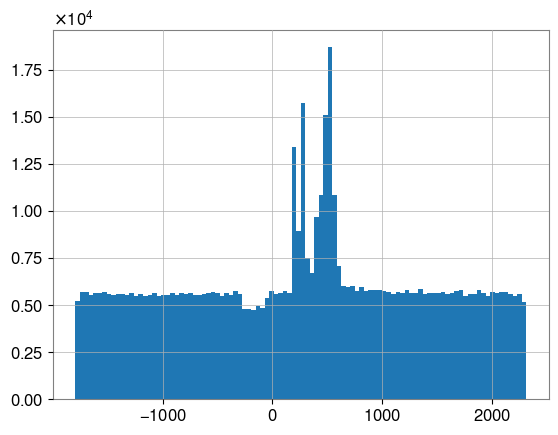

In [22]:
plt.figure()

# plt.plot(tc, rate - b)
# plt.plot(c)
plt.hist(ijd2plot(events_by_ext['COMP-SGLE-ALL']['TIME']), bins=100)

In [23]:
f = compton_event_file['255800290010']
f['COMP-SGLE-ALL'].data.shape

(270647,)

In [24]:
scw_dict_prompt['tstart_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTART)
scw_dict_prompt['tstop_since_t0_s'] = ijd2plot(scw_dict_prompt.TSTOP)

In [25]:
scw_dict_prompt.to_dict()

{'SWID': {0: '255800290010', 1: '255800290021', 2: '255800300010'},
 'SW_TYPE': {0: 'POINTING    ', 1: 'SLEW        ', 2: 'POINTING    '},
 'TELAPSE': {0: 1989.00133719435, 1: 116.000076779164, 2: 2001.0013319843},
 'TSTART': {0: 8317.53351369125, 1: 8317.55653454006, 2: 8317.55787713354},
 'TSTOP': {0: 8317.55653454006, 1: 8317.55787713354, 2: 8317.58103687118},
 'tstart_since_t0_s': {0: -1793.6010756413452,
  1: 195.4002613958437,
  2: 311.4003381750081},
 'tstop_since_t0_s': {0: 195.4002613958437,
  1: 311.4003381750081,
  2: 2312.4016701593064}}

In [26]:
lc_pdf="figs/prompt.pdf"
lc_p1_pdf="figs/prompt_p1.pdf"
T0_isot=T0_isot
data=dict(dd)
scws=scw_dict_prompt.to_dict()
sc=dd['sc']
T0_pointing_coord=dd['sc']['scx']
